In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('winequality-red.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
df.shape

(1599, 12)

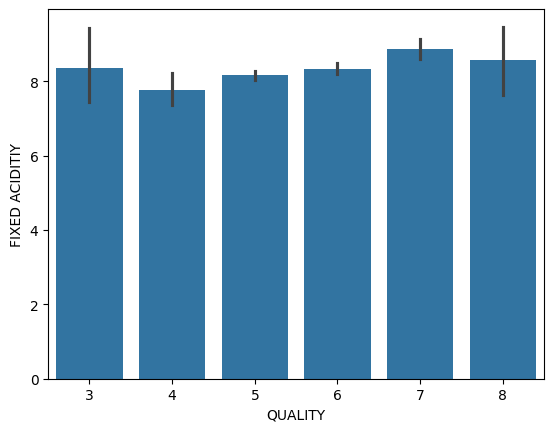

In [ ]:
#EDA
sns.barplot(x=df['quality'],y=df['fixed acidity'])
plt.xlabel('QUALITY')
plt.ylabel('FIXED ACIDITIY')
plt.show()

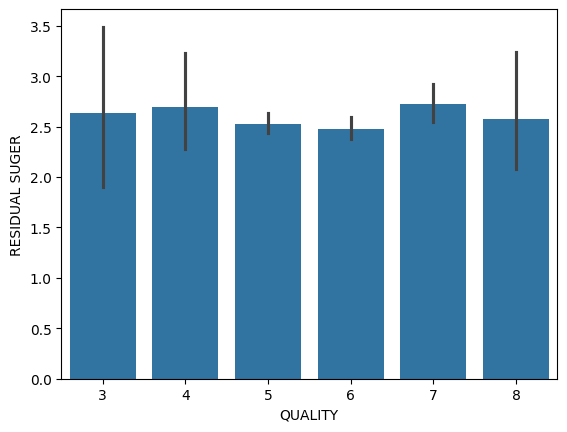

In [ ]:
sns.barplot(x=df['quality'],y=df['residual sugar'])
plt.xlabel('QUALITY')
plt.ylabel('RESIDUAL SUGER')
plt.show()

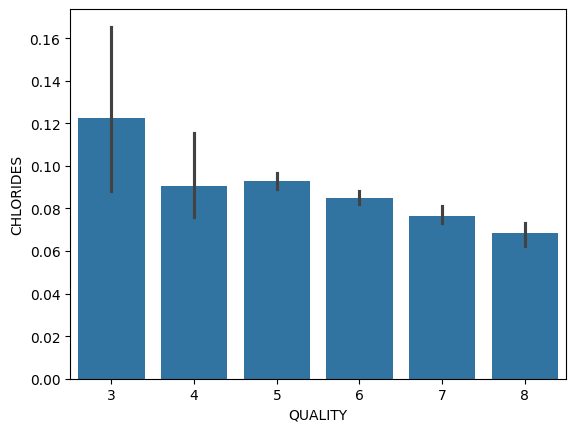

In [ ]:
sns.barplot(x=df['quality'],y=df['chlorides'])
plt.xlabel('QUALITY')
plt.ylabel('CHLORIDES')
plt.show()

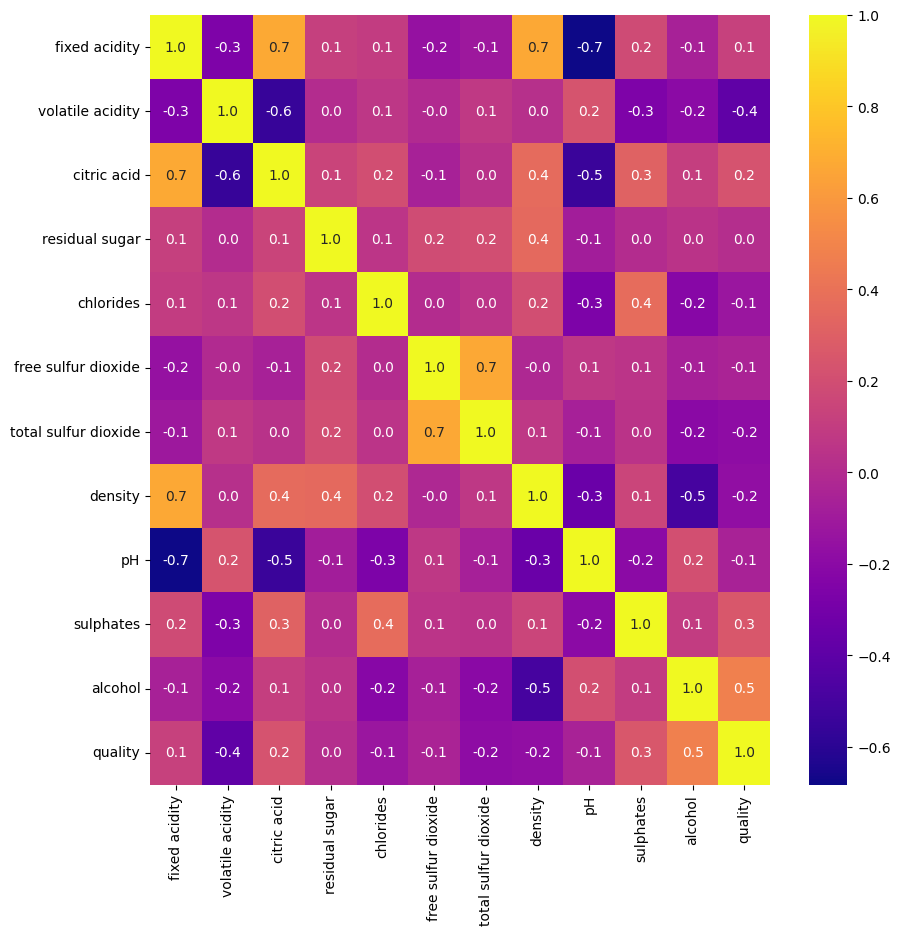

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma',fmt='0.1f')
plt.show()

In [ ]:
#BInarization of target variable 'quality'
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
#We will put all these 6 values into 2 values only 0 and 1
df['quality'] = [1 if x>7 else 0 for x in df['quality']]
df['quality'].unique()


array([0, 1])

In [ ]:
#checking the dist
df['quality'].value_counts()

quality
0    1581
1      18
Name: count, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='Density'>

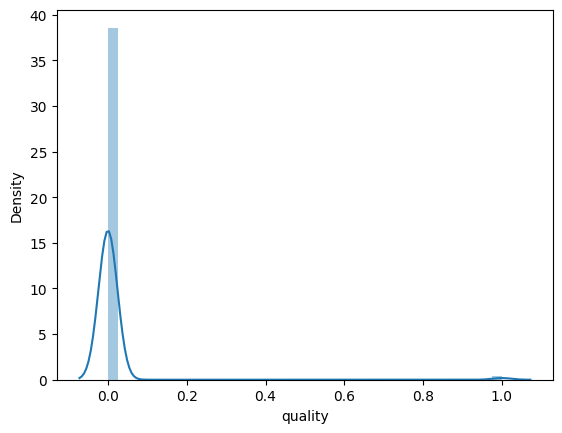

In [ ]:
#The data is highly imbalanced
sns.distplot(df['quality'])

In [ ]:
!pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install catboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 30.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
#So 1st we will continue withoout handling the imbalance problem
#SPlitting
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

#NOW we handle the imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE().fit_resample(x,y)

#train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42) #Change x and y to x_res and  y_res to see the difference after over_sampling

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#NOW we will apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)                       

#MODel selections
#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_pca,y_train)
rf.fit(x_train_pca,y_train)
gb.fit(x_train_pca,y_train)
xgb.fit(x_train_pca,y_train)
svc.fit(x_train_pca,y_train)
knn.fit(x_train_pca,y_train)
nb.fit(x_train_pca,y_train)
lgb.fit(x_train_pca,y_train)
cat.fit(x_train_pca,y_train)

1:	learn: 0.6486108	total: 49.9ms	remaining: 24.9s
2:	learn: 0.6295415	total: 51.7ms	remaining: 17.2s
3:	learn: 0.6109360	total: 53.4ms	remaining: 13.3s
4:	learn: 0.5945763	total: 55.1ms	remaining: 11s
5:	learn: 0.5785680	total: 56.8ms	remaining: 9.42s
6:	learn: 0.5598181	total: 58.6ms	remaining: 8.31s
7:	learn: 0.5480073	total: 60.3ms	remaining: 7.48s
8:	learn: 0.5333228	total: 62ms	remaining: 6.82s
9:	learn: 0.5195648	total: 63.7ms	remaining: 6.3s
10:	learn: 0.5055786	total: 65.4ms	remaining: 5.88s
11:	learn: 0.4912720	total: 67.2ms	remaining: 5.53s
12:	learn: 0.4769851	total: 68.9ms	remaining: 5.23s
13:	learn: 0.4651397	total: 70.6ms	remaining: 4.97s
14:	learn: 0.4551334	total: 72.3ms	remaining: 4.75s
15:	learn: 0.4446716	total: 74.1ms	remaining: 4.55s
16:	learn: 0.4340809	total: 75.8ms	remaining: 4.38s
17:	learn: 0.4234073	total: 77.5ms	remaining: 4.23s
18:	learn: 0.4140714	total: 79.3ms	remaining: 4.09s
19:	learn: 0.4039820	total: 81ms	remaining: 3.97s
20:	learn: 0.3947188	total: 

In [ ]:
#preds
lrpred = lr.predict(x_test_pca)
rfpred = rf.predict(x_test_pca)
gbpred = gb.predict(x_test_pca)
xgbpred = xgb.predict(x_test_pca)
svcpred = svc.predict(x_test_pca)
knnpred = knn.predict(x_test_pca)
nbpred = nb.predict(x_test_pca)
lgbpred = lgb.predict(x_test_pca)
catpred = cat.predict(x_test_pca)



In [ ]:
#Evaluations
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

#Precision Scores
lrp = precision_score(y_test,lrpred)
rfp = precision_score(y_test,rfpred)
gbp = precision_score(y_test,gbpred)
xgbp = precision_score(y_test,xgbpred)
svcp = precision_score(y_test,svcpred)
knnp = precision_score(y_test,knnpred)
nbp = precision_score(y_test,nbpred)
lgbp = precision_score(y_test,lgbpred)
catp = precision_score(y_test,catpred)

#REcall scores 
lrr = recall_score(y_test,lrpred)
rfr = recall_score(y_test,rfpred)
gbr = recall_score(y_test,gbpred)
xgbr = recall_score(y_test,xgbpred)
svcr = recall_score(y_test,svcpred)
knnr = recall_score(y_test,knnpred)
nbr = recall_score(y_test,nbpred)
lgbr = recall_score(y_test,lgbpred)
catr = recall_score(y_test,catpred)

#F1_scores  
lrf1 = f1_score(y_test,lrpred)
rff1 = f1_score(y_test,rfpred)
gbf1 = f1_score(y_test,gbpred)
xgbf1 = f1_score(y_test,xgbpred)
svcf1 = f1_score(y_test,svcpred)
knnf1 = f1_score(y_test,knnpred)
nbf1 = f1_score(y_test,nbpred)
lgbf1 = f1_score(y_test,lgbpred)
catf1 = f1_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)

print('''\n
	Below are Precision Scores of all the Models\n
	''')


print('LOGISTIC REG',lrp)
print('RANDOM FOREST',rfp)
print('GB',gbp)
print('XGB',xgbp)
print('SVC',svcp)
print('KNN',knnp)
print('NB',nbp)
print('LIGHT GBM',lgbp)
print('CATO',catp)

print('''\n
	Below are Recall Scores of all the Models\n
	''')


print('LOGISTIC REG',lrr)
print('RANDOM FOREST',rfr)
print('GB',gbr)
print('XGB',xgbr)
print('SVC',svcr)
print('KNN',knnr)
print('NB',nbr)
print('LIGHT GBM',lgbr)
print('CATO',catr)


print('''\n
	Below are F1 Scores of all the Models\n
	''')

print('LOGISTIC REG',lrf1)
print('RANDOM FOREST',rff1)
print('GB',gbf1)
print('XGB',xgbf1)
print('SVC',svcf1)
print('KNN',knnf1)
print('NB',nbf1)
print('LIGHT GBM',lgbf1)
print('CATO',catf1)

LOGISTIC REG 0.9304897314375987
RANDOM FOREST 0.9826224328593997
GB 0.9636650868878357
XGB 0.9747235387045814
SVC 0.9541864139020537
KNN 0.9589257503949447
NB 0.8657187993680885
LIGHT GBM 0.981042654028436
CATO 0.9747235387045814


	Below are Precision Scores of all the Models

	
LOGISTIC REG 0.88
RANDOM FOREST 0.9657320872274143
GB 0.9335347432024169
XGB 0.950920245398773
SVC 0.9144542772861357
KNN 0.9226190476190477
NB 0.835820895522388
LIGHT GBM 0.9627329192546584
CATO 0.950920245398773


	Below are Recall Scores of all the Models

	
LOGISTIC REG 0.9935483870967742
RANDOM FOREST 1.0
GB 0.9967741935483871
XGB 1.0
SVC 1.0
KNN 1.0
NB 0.9032258064516129
LIGHT GBM 1.0
CATO 1.0


	Below are F1 Scores of all the Models

	
LOGISTIC REG 0.9333333333333333
RANDOM FOREST 0.9825673534072901
GB 0.9641185647425896
XGB 0.9748427672955975
SVC 0.9553158705701079
KNN 0.9597523219814241
NB 0.8682170542635659
LIGHT GBM 0.9810126582278481
CATO 0.9748427672955975


In [ ]:
#NOw save the best model using joblib
import joblib
joblib.dump(xgb,'XGB WINE')

['XGB WINE']

In [ ]:
#load the model
winexgb_model = joblib.load('XGB WINE')

In [ ]:
data = pd.DataFrame({
    'fixed acidity':[7.3],
    'volatile acidity':[0.65],
    'citric acid':[0.00],
    'residual sugar':[1.2],
    'chlorides':[0.065],
    'free sulfur dioxide':[15.0],
    'total sulfur dioxide':[21.0],
    'density':[0.9946],
    'pH':[3.39],
    'sulphates':[0.47],
    'alcohol':[10.0],
},index=[0])

test = pca.transform(ss.transform(data))

p = winexgb_model.predict(test)

if p[0]==1:
    print('BEST QUALITY WINE')
else:
    print('BAKWAAS WINE')

BAKWAAS WINE


In [ ]:
#GUI
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    p11=float(e11.get())
    model = joblib.load('wine_quality_prediction')
    result=model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11]])))
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction Using Machine Learning")


label = Label(master, text = "Wine Quality Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=decaceb9-539d-4df3-a178-908e2ed6e268' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>